# Web scrapping on Nykaa Website (Skin Products)
+ We are going to scrape https://www.nykaa.com/makeup/face/face-foundation/c/228
+ We will extract details of each Product like Product name, Brand name, Original price, Discounted price, Gift, Offer and Reviews.
+ We will convert details in Dataframe and make csv/excel file.
+ Also, We will perform EDA.

### Importing Libraries
+ Pandas to create dataframe.
+ Numpy is used for working with arrays.
+ Seaborn and matplotlib for data visulization.
+ Requests library to access data from the web pages.
+ Beautiful Soap library for extracting data out of HTML and XML files.
+ Regex library(re) to use regular expressions in the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

In [2]:
url='https://www.nykaa.com/makeup/face/face-foundation/c/228'

In [3]:
page=requests.get(url)

In [4]:
#check response status
page.status_code

200

In [5]:
pagecontent=page.text
pagecontent

'<!doctype html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=5.0"/><meta name="theme-color" content="#fff"/><meta name="author" content="NykaaFrontendTeam"/><link rel="icon" href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" type="image/x-icon"/><link rel="canonical" href="https://www.nykaa.com/makeup/face/face-foundation/c/228"/><title data-react-helmet="true">Foundation Cream - Buy Face Foundation Cream at Best Price Online in India | Nykaa</title><meta data-react-helmet="true" name="description" content="Foundation Cream: Buy the best Face Foundation online at low price from Nykaa. Explore the Foundation Makeup collection for the best foundation for oily skin in India with the price under 300. ?Original Products ?COD ?Free Shipping"/><meta data-react-helmet="true" name="keywords" content="Buy face foundation online,  foundation online shopping, buy foundation product online, fac

In [6]:
soup=BeautifulSoup(pagecontent)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,maximum-scale=5.0" name="viewport"/><meta content="#fff" name="theme-color"/><meta content="NykaaFrontendTeam" name="author"/><link href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" rel="icon" type="image/x-icon"/><link href="https://www.nykaa.com/makeup/face/face-foundation/c/228" rel="canonical"/><title data-react-helmet="true">Foundation Cream - Buy Face Foundation Cream at Best Price Online in India | Nykaa</title><meta content="Foundation Cream: Buy the best Face Foundation online at low price from Nykaa. Explore the Foundation Makeup collection for the best foundation for oily skin in India with the price under 300. ?Original Products ?COD ?Free Shipping" data-react-helmet="true" name="description"/><meta content="Buy face foundation online,  foundation online shopping, buy foundation product online, face foundation online shopping" data-react-

In [7]:
# to get info. about Original price, Discounted price and Discount of the product
soup.find_all('div',attrs={'class':"css-1d0jf8e"})

[<div class="css-1d0jf8e"><style data-emotion-css="17x46n5">.css-17x46n5{margin-right:0.25rem;color:rgba(0,19,37,0.64);font-size:14px;font-weight:400;line-height:20px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;}.css-17x46n5 span{-webkit-text-decoration-line:line-through;text-decoration-line:line-through;padding-left:0.25rem;font-size:14px;font-weight:400;line-height:20px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;}</style><span class="css-17x46n5">MRP:<span>₹629</span></span><style data-emotion-css="111z9ua">.css-111z9ua{color:#001325;font-size:14px;font-weight:500;line-height:20px;-webkit-letter-spacing:-0.1px;-moz-letter-spacing:-0.1px;-ms-letter-spacing:-0.1px;letter-spacing:-0.1px;}</style><span class="css-111z9ua">₹409</span><style data-emotion-css="r2b2eh">.css-r2b2eh{color:#008945;margin-left:4px;padding-left:4px;border-left:1px solid #eeeeee;font-size:14px;font-weight:400;line-height:20px;-webki

In [8]:
# to get entire product info.
list_1=soup.find_all('div',attrs={'class':"css-1rd7vky"})
list_1

[<div class="css-1rd7vky"><style data-emotion-css="xrzmfa">.css-xrzmfa{font-size:14px;font-weight:500;line-height:20px;-webkit-letter-spacing:-0.1px;-moz-letter-spacing:-0.1px;-ms-letter-spacing:-0.1px;letter-spacing:-0.1px;overflow:hidden;height:42px;margin-bottom:0.75rem;text-align:center;color:#001325;text-overflow:ellipsis;}</style><div class="css-xrzmfa">Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...</div><style data-emotion-css="1d0jf8e">.css-1d0jf8e{line-height:20px;margin-bottom:0.75rem;display:-webkit-inline-box;display:-webkit-inline-flex;display:-ms-inline-flexbox;display:inline-flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;-webkit-flex-wrap:wrap;-ms-flex-wrap:wrap;flex-wrap:wrap;}</style><div class="css-1d0jf8e"><style data-emotion-css="17x46n5">.css-17x46n5{margin-right:0.25rem;color:rgba(0,19,37,0.64);font-

In [9]:
# to get original prices of each product from list_1
list_original=[]
for i in list_1:
    original=i.find('span',attrs={'class':"css-17x46n5"})
    list_original.append(original.text)
list_original

['MRP:₹629',
 'MRP:₹850',
 'MRP:',
 'MRP:₹599',
 'MRP:₹3250',
 'MRP:₹1200',
 'MRP:',
 'MRP:',
 'MRP:₹895',
 'MRP:₹750',
 'MRP:',
 'MRP:₹325',
 'MRP:',
 'MRP:₹799',
 'MRP:₹949',
 'MRP:',
 'MRP:₹600',
 'MRP:₹500',
 'MRP:',
 'MRP:₹1649']

In [10]:
# to get discounted prices of each product from list_1
list_price=[]
for i in list_1:
    price=i.find('span',attrs={'class':"css-111z9ua"})
    list_price.append(price.text)
list_price

['₹409',
 '₹510',
 '₹2900',
 '₹359',
 '₹1950',
 '₹720',
 '₹4300',
 '₹549',
 '₹761',
 '₹452',
 '₹2950',
 '₹211',
 '₹1750',
 '₹479',
 '₹807',
 '₹3300',
 '₹360',
 '₹300',
 '₹999',
 '₹1402']

In [11]:
# to get all the Product names from list_1
list_name=[]
for i in list_1:
    name=i.find('div',attrs={'class':"css-xrzmfa"})
    list_name.append(name.text)
list_name

['Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...',
 'Lakme Absolute Skin Natural Mousse Mattreal Foundation',
 'M.A.C Studio Fix Fluid SPF 15',
 'Nykaa All Day Matte Long Wear Liquid Foundation With Pump',
 'Huda Beauty Fauxfilter Skin Finish Buildable Coverage Founda...',
 'Kay Beauty Hydrating Foundation',
 'Bobbi Brown Skin Long-Wear Weightless Foundation SPF 15',
 'Faces Canada 3 In 1 All Day Hydra Matte Foundation',
 'PAC HD Liquid Foundation',
 "L'Oreal Paris Infallible 24h Matte Cover Liquid Foundation",
 'M.A.C Studio Fix Powder Plus Foundation',
 'Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...',
 'M.A.C Studio Fix Fluid SPF 15 Mini',
 'Maybelline New York Super Stay Full Coverage Foundation',
 'Daily Life Forever52 Ultra Definition Liquid Foundation',
 'Huda Beauty Fauxfilter Luminous Matte Full Coverage Liquid F...',
 'Lakme 9 to 5 Primer + Matte Powder Foundation Compact',
 'Lakme 9 To 5 Primer + Matte Perfect Cover Foundation',
 'SUGAR Ace 

In [12]:
# to get reviews of each Product from list_1
list_reviews=[]
for i in list_1:
    reviews=i.find('div',attrs={'class':"css-wskh5y"})
    list_reviews.append(reviews.text)
list_reviews

['( 73831 )',
 '( 29122 )',
 '( 10545 )',
 '( 2650 )',
 '( 489 )',
 '( 5056 )',
 '( 1097 )',
 '( 396 )',
 '( 9754 )',
 '( 6476 )',
 '( 10037 )',
 '( 55000 )',
 '( 5374 )',
 '( 27442 )',
 '( 6722 )',
 '( 2132 )',
 '( 16005 )',
 '( 19480 )',
 '( 5376 )',
 '( 833 )']

In [13]:
# to get shades of each Product
list_2=soup.find_all('div',attrs={'class':"css-a7hmoe"})
list_2

[<div class="css-a7hmoe"><style data-emotion-css="asphnc">.css-asphnc{font-size:12px;font-weight:400;line-height:16px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;color:#657786;margin:0;padding:0;text-transform:capitalize;}</style><div class="css-asphnc">21 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">9 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">52 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">15 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">30 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">20 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">42 shade

In [14]:
list_2[3]

<div class="css-a7hmoe"><div class="css-asphnc">15 shades</div></div>

In [15]:
# to get shades of each Product from list_2
list_shades=[]
for i in list_2:
    shades=i.find('div',attrs={'class':'css-asphnc'})
    print(shades.text)

21 shades
9 shades
52 shades
15 shades
30 shades
20 shades
42 shades
10 shades
26 shades
26 shades
38 shades
6 shades
10 shades
9 shades
12 shades
30 shades
6 shades
16 shades
22 shades
12 shades


In [16]:
# to get offer of each Product from list_1
list_offer=[]
for i in list_1:
    offer=soup.find('span',attrs={'class':"css-r2b2eh"})
    print(offer.text)


35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off
35% Off


In [17]:
# to get gift available for each Product from list_1
list_gift=[]
for i in list_1:
    gift=soup.find('p',attrs={'class':"css-i6xqbh"})
    print(gift.text)

Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product
Get Free Product


In [18]:
# Let's get details of 29 pages
list_name=[]
list_price=[]
list_reviews=[]
list_original=[]
list_shades=[]
list_gift=[]
list_offer=[]
for i in range(1,30):
    URL='https://www.nykaa.com/makeup/face/face-foundation/c/228?page_no='+str(i)
    page=requests.get(URL)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)
    list_1=soup.find_all('div',attrs={'class':"css-1rd7vky"})
    
    for j in list_1:
        price=j.find('span',attrs={'class':"css-111z9ua"})
        
        if price is None:
            list_price.append(np.NaN)
        else:
            list_price.append(price.text)
            
        name=j.find('div',attrs={'class':'css-xrzmfa'})
        
        if name is None:
            list_name.append(np.NaN)
        else:
            list_name.append(name.text)
            
        reviews=j.find('div',attrs={'class':"css-wskh5y"})
        
        if reviews is None:
            list_reviews.append(np.NaN)
        else:
            list_reviews.append(reviews.text)
            
        original=j.find('span',attrs={'class':'css-17x46n5'})
        
        if original is None:
            list_original.append(np.NaN)
        else:
            list_original.append(original.text)
        
        shades=j.find('div',attrs={'class':'css-asphnc'})
        
        if shades is None:
            list_shades.append(np.NaN)
        else:
            list_shades.append(shades.text)
            
        offer=j.find('span',attrs={'class':"css-r2b2eh"})
        
        if offer is None:
            list_offer.append(np.NaN)
        else:
            list_offer.append(offer.text)
            
        gift=j.find('p',attrs={'class':"css-i6xqbh"})
        
        if gift is None:
            list_gift.append(np.NaN)
        else:
            list_gift.append(gift.text)

In [19]:
len(list_name)

580

In [20]:
len(list_price)

580

In [21]:
len(list_reviews)

580

In [22]:
len(list_original)

580

In [23]:
len(list_shades)

580

In [24]:
len(list_gift)

580

In [25]:
len(list_offer)

580

### Data Preprocessing
+ Process of transforming raw data into an understandable format.
+ It is an important step as we can not work with raw and noisy data.
+ Before visulization, quality of data should be checked.

In [26]:
nykaa=pd.DataFrame({'Product':list_name,'Original Price':list_original,'Gift':list_gift,'Discounted Price':list_price,'Offer':list_offer,'Reviews':list_reviews,'Shades':list_shades})

In [27]:
nykaa.to_excel("nykaa.xlsx")

In [28]:
nykaa=pd.read_excel("nykaa.xlsx")

In [29]:
nykaa.head(30)

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,Get Free Product,₹409,35% Off,( 73831 ),21 shades
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,MRP:₹850,NaN,₹510,40% Off,( 29122 ),9 shades
2,2,M.A.C Studio Fix Fluid SPF 15,MRP:,Buy 2 Get 1 Free,₹2900,NaN,( 10545 ),52 shades
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,Get Free Product,₹359,40% Off,( 2650 ),15 shades
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,MRP:₹3250,NaN,₹1950,40% Off,( 489 ),30 shades
5,5,Kay Beauty Hydrating Foundation,MRP:₹1200,Get Free Product,₹720,40% Off,( 5056 ),20 shades
6,6,Bobbi Brown Skin Long-Wear Weightless Foundati...,MRP:,NaN,₹4300,NaN,( 1097 ),42 shades
7,7,Faces Canada 3 In 1 All Day Hydra Matte Founda...,MRP:,Buy 1 Get 1 Free,₹549,NaN,( 396 ),10 shades
8,8,PAC HD Liquid Foundation,MRP:₹895,Enjoy Free Gift,₹761,15% Off,( 9754 ),26 shades
9,9,L'Oreal Paris Infallible 24h Matte Cover Liqui...,MRP:₹750,Enjoy Free Gift,₹452,40% Off,( 6476 ),26 shades


In [30]:
nykaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        580 non-null    int64 
 1   Product           580 non-null    object
 2   Original Price    580 non-null    object
 3   Gift              228 non-null    object
 4   Discounted Price  580 non-null    object
 5   Offer             354 non-null    object
 6   Reviews           545 non-null    object
 7   Shades            379 non-null    object
dtypes: int64(1), object(7)
memory usage: 36.4+ KB


In [31]:
nykaa.Product[0]

'Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...'

In [32]:
nykaa.Reviews[0]

'( 73831 )'

In [33]:
po=re.compile('\w+')
po.search(nykaa.Product[1]).group()

'Lakme'

In [34]:
# adding a new column to the dataframe
nykaa['Brand Name']=nykaa['Product'].apply(lambda x:re.compile('[A-Za-z0-9\.\']+').search(x).group())

In [35]:
nykaa.head(10)

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,Get Free Product,₹409,35% Off,( 73831 ),21 shades,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,MRP:₹850,NaN,₹510,40% Off,( 29122 ),9 shades,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,MRP:,Buy 2 Get 1 Free,₹2900,NaN,( 10545 ),52 shades,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,Get Free Product,₹359,40% Off,( 2650 ),15 shades,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,MRP:₹3250,NaN,₹1950,40% Off,( 489 ),30 shades,Huda
5,5,Kay Beauty Hydrating Foundation,MRP:₹1200,Get Free Product,₹720,40% Off,( 5056 ),20 shades,Kay
6,6,Bobbi Brown Skin Long-Wear Weightless Foundati...,MRP:,NaN,₹4300,NaN,( 1097 ),42 shades,Bobbi
7,7,Faces Canada 3 In 1 All Day Hydra Matte Founda...,MRP:,Buy 1 Get 1 Free,₹549,NaN,( 396 ),10 shades,Faces
8,8,PAC HD Liquid Foundation,MRP:₹895,Enjoy Free Gift,₹761,15% Off,( 9754 ),26 shades,PAC
9,9,L'Oreal Paris Infallible 24h Matte Cover Liqui...,MRP:₹750,Enjoy Free Gift,₹452,40% Off,( 6476 ),26 shades,L'Oreal


In [36]:
# Let's check count of null values.
nykaa.isnull().sum()

Unnamed: 0            0
Product               0
Original Price        0
Gift                352
Discounted Price      0
Offer               226
Reviews              35
Shades              201
Brand Name            0
dtype: int64

In [37]:
nykaa['Brand Name'].value_counts()

Nykaa         47
Maybelline    25
Paese         25
Lakme         20
Insight       19
              ..
ZM             1
Butter         1
C2P            1
Revolution     1
Natio          1
Name: Brand Name, Length: 110, dtype: int64

In [38]:
nykaa['Brand Name'].unique()

array(['Maybelline', 'Lakme', 'M.A.C', 'Nykaa', 'Huda', 'Kay', 'Bobbi',
       'Faces', 'PAC', "L'Oreal", 'Daily', 'SUGAR', 'Mamaearth',
       'Charlotte', 'Milani', 'Estee', 'Too', 'L.A', 'Blue', 'IBA',
       'e.l.f.', 'Swiss', 'NYX', 'Colorbar', 'Insight', 'Smashbox',
       'Dermacol', 'Iba', 'Rimmel', 'DIOR', 'Makeup', 'Just', 'MARS',
       'Clinique', 'Chambor', 'Miss', 'Wet', 'Biotique', 'Lotus',
       "Ruby's", 'Anastasia', 'Charmacy', 'Renee', 'Ilana', 'Viseart',
       'Revlon', 'Nudestix', 'Flower', 'PIXI', 'The', 'Coloressence',
       'MyGlamm', 'Kiko', 'MAKE', 'L.A.', 'By', 'Givenchy', 'Matt', 'Max',
       'SERY', 'Benefit', 'Olivia', 'Guerlain', 'Majestique', 'Shiseido',
       'Butter', 'Stars', 'Bella', 'Revolution', 'Paese', 'Beauty',
       'Gala', 'Deborah', 'FOREO', 'Bharat', 'FASHION', 'Inglot',
       'Essence', 'C2P', 'Note', 'Incolor', 'Cinema', 'ZM', 'MUA', 'Half',
       'amag', 'Lenphor', 'Elizabeth', 'Tinge', 'Keya', 'La', 'Lottie',
       'GlamGals', '

### Data Cleaning
+ The data can have many irrelevant and missing value.
+ Process of detecting and correcting noisy,irrelevant or inaccurate records drom dataset.

In [39]:
# remove shade/shades from Shades
nykaa['Shades']=nykaa['Shades'].apply(lambda x:str(x).replace('shades',''))

In [40]:
nykaa['Shades']=nykaa['Shades'].apply(lambda x:str(x).replace('shade',''))

In [41]:
nykaa.head()

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,Get Free Product,₹409,35% Off,( 73831 ),21,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,MRP:₹850,NaN,₹510,40% Off,( 29122 ),9,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,MRP:,Buy 2 Get 1 Free,₹2900,NaN,( 10545 ),52,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,Get Free Product,₹359,40% Off,( 2650 ),15,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,MRP:₹3250,NaN,₹1950,40% Off,( 489 ),30,Huda


In [42]:
# remove 'MRP:₹' from Original Price
nykaa['Original Price']=nykaa['Original Price'].apply(lambda x:str(x).replace('MRP','').replace(":",""))
nykaa['Original Price']=nykaa['Original Price'].apply(lambda x:str(x).replace('₹',''))

In [43]:
nykaa.head()

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,629,Get Free Product,₹409,35% Off,( 73831 ),21,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,850,NaN,₹510,40% Off,( 29122 ),9,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,,Buy 2 Get 1 Free,₹2900,NaN,( 10545 ),52,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,Get Free Product,₹359,40% Off,( 2650 ),15,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,3250,NaN,₹1950,40% Off,( 489 ),30,Huda


In [44]:
# remove '₹' from Discounted Price
nykaa['Discounted Price']=nykaa['Discounted Price'].apply(lambda x:str(x).replace('₹',''))

In [45]:
nykaa.head()

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,629,Get Free Product,409,35% Off,( 73831 ),21,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,850,NaN,510,40% Off,( 29122 ),9,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,,Buy 2 Get 1 Free,2900,NaN,( 10545 ),52,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,Get Free Product,359,40% Off,( 2650 ),15,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,3250,NaN,1950,40% Off,( 489 ),30,Huda


In [46]:
# remove '(' and ')' from Reviews column
nykaa['Reviews']=nykaa['Reviews'].apply(lambda x:str(x).replace('(',''))
nykaa['Reviews']=nykaa['Reviews'].apply(lambda x:str(x).replace(')',''))

In [47]:
nykaa['Reviews']=nykaa['Reviews'].apply(lambda x:str(x).replace('nan',"0"))

In [48]:
nykaa.head()

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,629,Get Free Product,409,35% Off,73831,21,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,850,NaN,510,40% Off,29122,9,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,,Buy 2 Get 1 Free,2900,NaN,10545,52,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,Get Free Product,359,40% Off,2650,15,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,3250,NaN,1950,40% Off,489,30,Huda


In [49]:
nykaa.isnull().sum()

Unnamed: 0            0
Product               0
Original Price        0
Gift                352
Discounted Price      0
Offer               226
Reviews               0
Shades                0
Brand Name            0
dtype: int64

In [50]:
# replace NaN with 0 % Off
nykaa['Offer']=nykaa['Offer'].apply(lambda x:str(x).replace('nan',"0 % Off"))

In [51]:
nykaa['Gift']=nykaa['Gift'].apply(lambda x:str(x).replace('nan',"no gift"))

In [52]:
nykaa.head()

,Unnamed: 0,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Maybelline New York Fit Me Matte+Poreless Liqu...,629,Get Free Product,409,35% Off,73831,21,Maybelline
1,1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,850,no gift,510,40% Off,29122,9,Lakme
2,2,M.A.C Studio Fix Fluid SPF 15,,Buy 2 Get 1 Free,2900,0 % Off,10545,52,M.A.C
3,3,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,Get Free Product,359,40% Off,2650,15,Nykaa
4,4,Huda Beauty Fauxfilter Skin Finish Buildable C...,3250,no gift,1950,40% Off,489,30,Huda


In [53]:
# wherever the offer is NaN, consider discounted price as original price
for x,y in enumerate(nykaa["Offer"]):
    if y == np.NaN:
        nykaa['Original Price'][x]= nykaa['Discounted Price'][x]

In [54]:
# wherever there is no value in original price, consider that value same as discounted price
for x,y in enumerate(nykaa['Original Price']):
    if y=='':
        nykaa['Original Price'][x]= nykaa['Discounted Price'][x]

C:\Users\k.udaya shree\AppData\Local\Temp\ipykernel_13028\210483538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa['Original Price'][x]= nykaa['Discounted Price'][x]


In [55]:
nykaa.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [56]:
nykaa.head(20)

,Product,Original Price,Gift,Discounted Price,Offer,Reviews,Shades,Brand Name
0,Maybelline New York Fit Me Matte+Poreless Liqu...,629,Get Free Product,409,35% Off,73831,21,Maybelline
1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,850,no gift,510,40% Off,29122,9,Lakme
2,M.A.C Studio Fix Fluid SPF 15,2900,Buy 2 Get 1 Free,2900,0 % Off,10545,52,M.A.C
3,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,Get Free Product,359,40% Off,2650,15,Nykaa
4,Huda Beauty Fauxfilter Skin Finish Buildable C...,3250,no gift,1950,40% Off,489,30,Huda
5,Kay Beauty Hydrating Foundation,1200,Get Free Product,720,40% Off,5056,20,Kay
6,Bobbi Brown Skin Long-Wear Weightless Foundati...,4300,no gift,4300,0 % Off,1097,42,Bobbi
7,Faces Canada 3 In 1 All Day Hydra Matte Founda...,549,Buy 1 Get 1 Free,549,0 % Off,396,10,Faces
8,PAC HD Liquid Foundation,895,Enjoy Free Gift,761,15% Off,9754,26,PAC
9,L'Oreal Paris Infallible 24h Matte Cover Liqui...,750,Enjoy Free Gift,452,40% Off,6476,26,L'Oreal


In [57]:
nykaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           580 non-null    object
 1   Original Price    580 non-null    object
 2   Gift              580 non-null    object
 3   Discounted Price  580 non-null    object
 4   Offer             580 non-null    object
 5   Reviews           580 non-null    object
 6   Shades            580 non-null    object
 7   Brand Name        580 non-null    object
dtypes: object(8)
memory usage: 36.4+ KB


In [58]:
# considering a list to re-order the columns
list=['Product','Brand Name','Shades','Original Price','Offer','Discounted Price','Gift','Reviews']
cosmetic=nykaa.reindex(columns=list)
cosmetic

,Product,Brand Name,Shades,Original Price,Offer,Discounted Price,Gift,Reviews
0,Maybelline New York Fit Me Matte+Poreless Liqu...,Maybelline,21,629,35% Off,409,Get Free Product,73831
1,Lakme Absolute Skin Natural Mousse Mattreal Fo...,Lakme,9,850,40% Off,510,no gift,29122
2,M.A.C Studio Fix Fluid SPF 15,M.A.C,52,2900,0 % Off,2900,Buy 2 Get 1 Free,10545
3,Nykaa All Day Matte Long Wear Liquid Foundatio...,Nykaa,15,599,40% Off,359,Get Free Product,2650
4,Huda Beauty Fauxfilter Skin Finish Buildable C...,Huda,30,3250,40% Off,1950,no gift,489
...,...,...,...,...,...,...,...,...
575,Shiseido Sheer and Perfect Compact Foundation ...,Shiseido,5,2150,40% Off,1290,no gift,26
576,Natio Flawless Foundation SPF 15,Natio,4,1325,0 % Off,1325,no gift,34
577,Gala Of London Liquid Matte Foundation,Gala,2,125,0 % Off,125,no gift,22
578,FASHION COLOUR Oil Free Sunscreen Foundation,FASHION,2,400,0 % Off,400,no gift,0


In [59]:
cosmetic.isnull().sum()

Product             0
Brand Name          0
Shades              0
Original Price      0
Offer               0
Discounted Price    0
Gift                0
Reviews             0
dtype: int64

+ As we can see all column data with Object dtype.
+ Let's change dtype of numeric value columns.

In [60]:
cosmetic["Original Price"]=cosmetic["Original Price"].astype(float)
cosmetic["Discounted Price"]=cosmetic["Discounted Price"].astype(float)
cosmetic["Reviews"]=cosmetic["Reviews"].astype(float)
print(cosmetic.dtypes)

Product              object
Brand Name           object
Shades               object
Original Price      float64
Offer                object
Discounted Price    float64
Gift                 object
Reviews             float64
dtype: object


In [61]:
cosmetic.describe()

,Original Price,Discounted Price,Reviews
count,580.000000,580.000000,580.000000
mean,1652.451724,1445.529310,1320.498276
std,1769.243510,1638.522513,5034.778707
min,75.000000,60.000000,0.000000
25%,582.500000,437.250000,8.000000
50%,1065.000000,824.000000,42.000000
75%,2111.750000,1962.250000,320.000000
max,22120.000000,17696.000000,73831.000000


In [62]:
# total 578 rows and 8 columns
cosmetic.shape

(580, 8)

## Data Visualization
+ Let's compare Original and Offer price of first 10 Products.

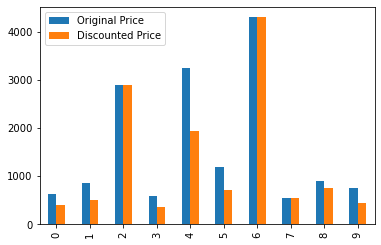

In [63]:
cosmetic[['Original Price','Discounted Price']][:10].plot(kind='bar');

+ As we can see Offer price is either less or equal to Original price.

Let's plot histogram for Original Price using seaborn library.
It will give us idea of highest range.

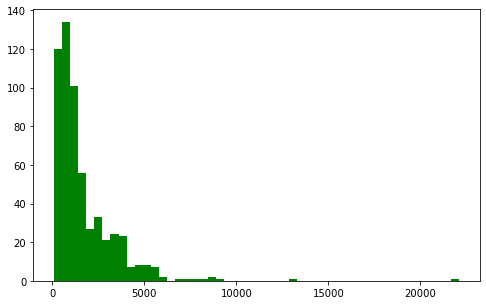

In [81]:
plt.figure(figsize = (8,5))
plt.hist(data = cosmetic, x = 'Original Price',bins=50, color = 'Green');
plt.show()

+ As we can see most comman range for price is 0 - 4000

+ So, let's plot for common price range.

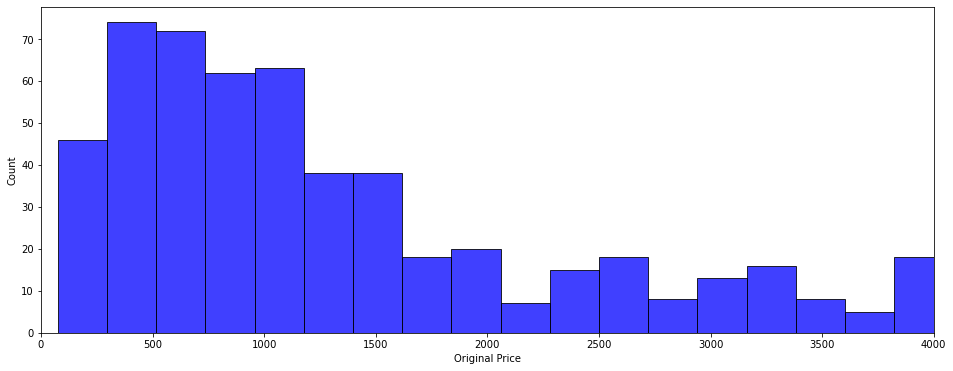

In [65]:
plt.figure(figsize = (16,6))
g = sns.histplot(data = cosmetic, x = 'Original Price', bins = 100,color = 'Blue')
g.set(xlim = (0,4000))
g
plt.show()

+ Now, Let's check count of Gift categories.

+ Here we will use countplot.

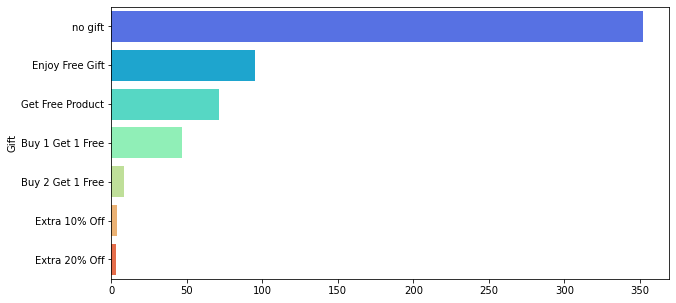

In [66]:
Gift = cosmetic.value_counts('Gift').sort_values(ascending=False)
plt.figure(figsize = (10,5))
sns.barplot(y=Gift.index,x = Gift,palette='rainbow');

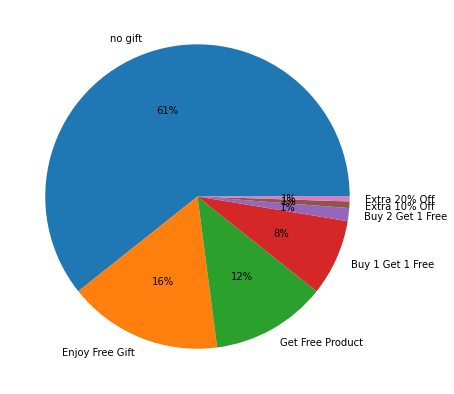

In [67]:
g = cosmetic['Gift'].value_counts().head(10)
plt.figure(figsize = (7,7))
plt.pie(x = g, data = cosmetic,labels = g.index,autopct='%.0f%%')
plt.show()

+ As we see, There are 6 different gifts.
+ 'No Gift' with 400+ count.
+ 'Enjoy Free gift' with nearer to 120 count.
+ 'Buy 1 Get 1 Free' with least count.

Now, Let's plot and check different discount count.

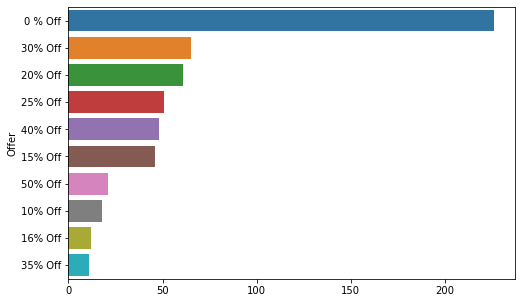

In [68]:
a = cosmetic.value_counts('Offer').sort_values(ascending=False)
plt.figure(figsize = (8,5))
sns.barplot(y=a.index[:10],x=a[:10])
plt.show()

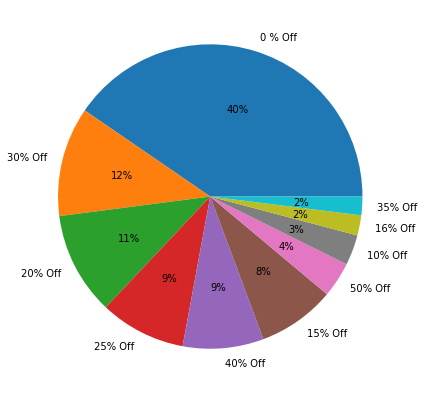

In [69]:
Offer = cosmetic['Offer'].value_counts().head(10)
plt.figure(figsize = (7,7))
plt.pie(x = Offer, data = cosmetic,labels = Offer.index,autopct='%.0f%%')
plt.show()

+ As we see, There are 10 different discounts.
+ '0% Off' with nearer to below 300 count.
+ '40% Off' with least count.

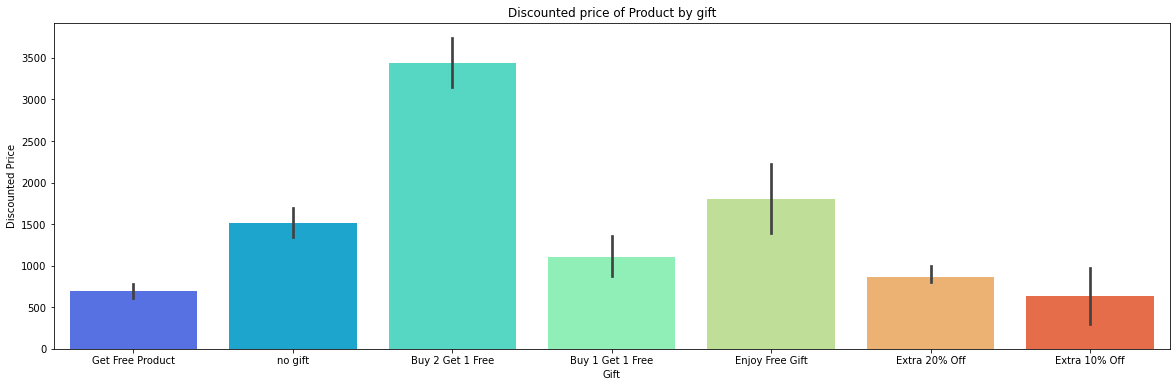

In [70]:
plt.figure(figsize=(20,6))
sns.barplot(x='Gift',y='Discounted Price',data= cosmetic,palette='rainbow')
plt.title('Discounted price of Product by gift')
plt.show()

+ Buy 2 Get 1 Free has the highest median.

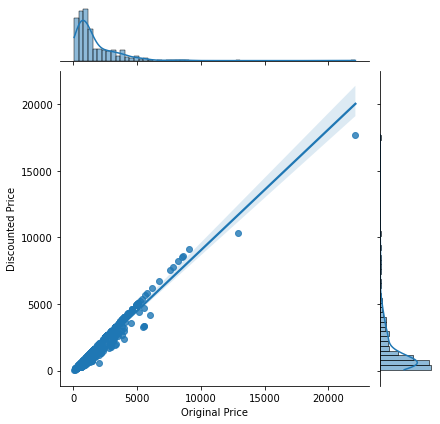

In [71]:
sns.jointplot(x='Original Price', y='Discounted Price', data=cosmetic, kind='reg');

+ the above plot(Original Price)(univariate) and side plot(Discounted Price)(univariate) are histogram plots with frequency curves and the big plot(bi-variate) is regression plot with confidence interval

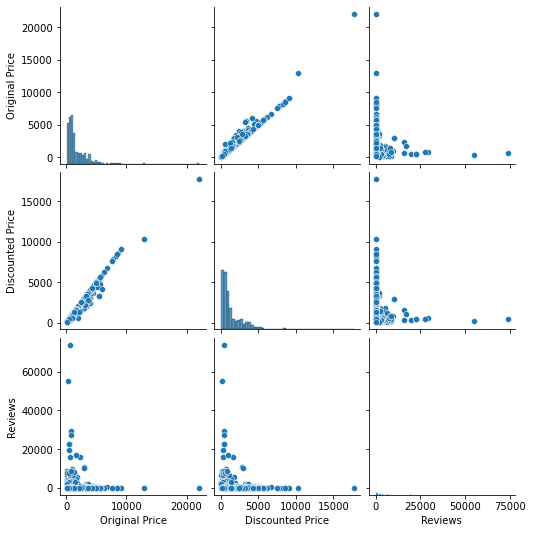

In [72]:
sns.pairplot(cosmetic);

+ the diagonal plots are histograms(uni-variate) and non-diagonal plots are scatter plots

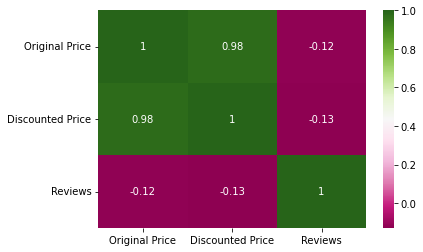

In [73]:
sns.heatmap(cosmetic.corr(),annot=True,cmap='PiYG');

+ since we are plotting two or more variables, we must know the ratio/correlation between them. that's why we are using corr() and annot is used to display correlated values on each box.
+ heatmap is not constrained by no. of numerical variables like the pairplot.

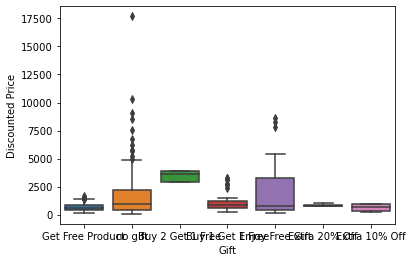

In [74]:
sns.boxplot(x='Gift',y='Discounted Price',data=cosmetic)
plt.show()

+ there are outliers in no gift, Enjoy free gift, Get free product and Buy 1 Get 1 free. And Buy 1 Get 1 Free has the highest median with respect to Discounted price.

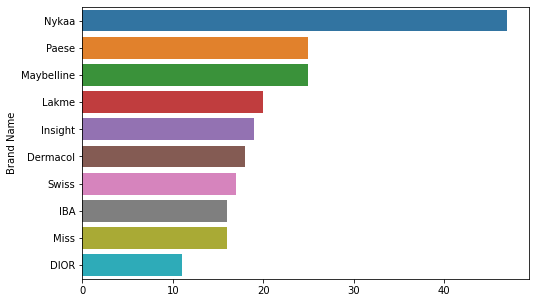

In [75]:
a = cosmetic.value_counts('Brand Name').sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(y=a.index[:10],x=a[:10])
plt.show()

+ These are the top 10 brands based on the quality of the product  and customer reviews